### Choose a dataset to Visulaize
* Import needed libraries 
* Load your dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
NetflixData = pd.read_csv('netflix.csv')
NetflixData.head()

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80


In [3]:
NetflixData.describe()

,ratingDescription,release year,user rating score,user rating size
count,1000.00000,1000.000000,605.000000,1000.000000
mean,67.36600,2010.335000,84.094215,80.783000
std,30.78561,8.877927,12.344371,0.973066
min,10.00000,1940.000000,55.000000,80.000000
25%,35.00000,2007.000000,75.000000,80.000000
50%,60.00000,2015.000000,88.000000,80.000000
75%,90.00000,2016.000000,95.000000,82.000000
max,124.00000,2017.000000,99.000000,82.000000


In [4]:
NetflixData.describe(exclude='number')

,title,rating,ratingLevel
count,1000,1000,941
unique,496,13,99
top,13 Reasons Why,TV-14,Parents strongly cautioned. May be unsuitable ...
freq,8,234,224


### Univariate Visualization 
* Plot two Charts
* Provide each charts with at least two insights 

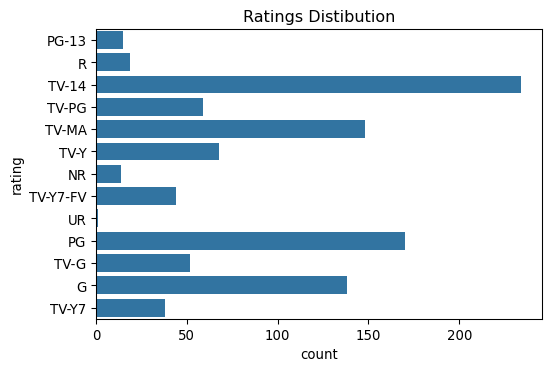

In [5]:
plt.figure(dpi=96)
sns.countplot(data=NetflixData, y='rating', color= sns.color_palette()[0])
plt.title('Ratings Distibution')
plt.show()

| Rating (SHOWS) | Description (SHOWS) | Rating (MOVIES) | Description (MOVIES) |
|---|---|---|---|
|TV-Y| All Children|G| General Audiences|
|TV-Y7| Directed to Older Children|PG| Parental Guidance Suggested|
|TV-Y7 FV| Directed to Older Children - Fantasy Violence|PG-13| Parents Strongly Cautioned|
|TV-G| General Audience|R| Restricted|
|TV-PG| Parental Guidance Suggested|NC-17| Clearly Adult|
|TV-14| Parents Strongly Cautioned|
|TV-MA| Mature Audience Only|






#### Write your insghts here

- **TV-14 is the most rating of shows in NETFLIX.**
- **PG rating is the most movies rating in NETFLIX.**

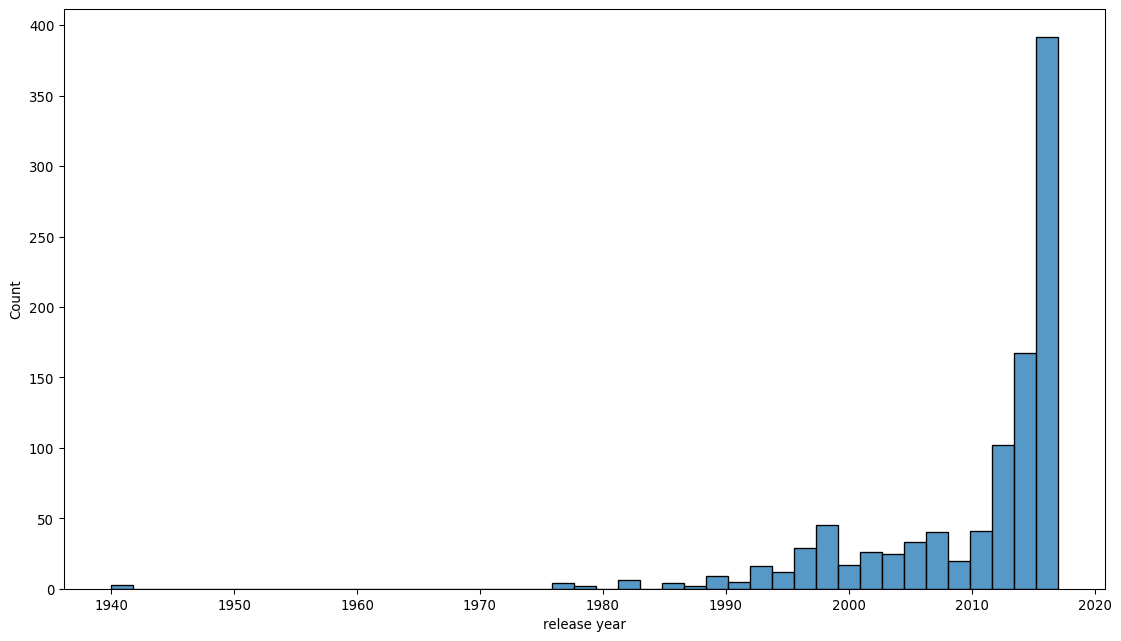

In [6]:
plt.figure(figsize=(14,8), dpi= 96)
sns.histplot(data= NetflixData, x= 'release year')
plt.show()

#### Write your insghts here

- **Form 90's the moives count started to raise**
- **2017 was the peak of omives count in NETFLIX**

### Bivariate Visualization 
* Plot two Charts
* Provide each charts with at least two insights 

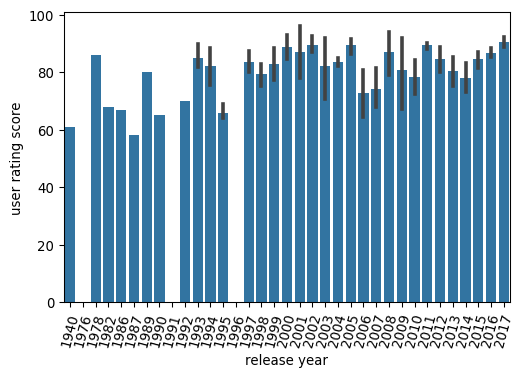

In [7]:
plt.figure(dpi=96)
sns.barplot(data= NetflixData, y='user rating score', x='release year',color= sns.color_palette()[0])
plt.xticks(rotation=75)
plt.show()

#### Write your insghts here

- **The distribution of User Ratings Scorce is Uniform (most likely)**

<AxesSubplot:>

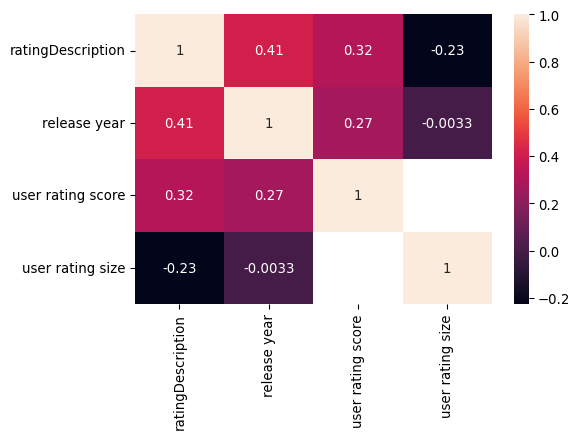

In [8]:
plt.figure(dpi=96)
sns.heatmap(NetflixData.corr(), annot=True)

#### Write your insghts here

- **Relase yaer and user score has positive relation, that make us assume that the show or moive quality improves to meet users taste or expectations.**

### Multivariate Visualization 
* Plot two Charts
* Provide each charts with at least two insights 

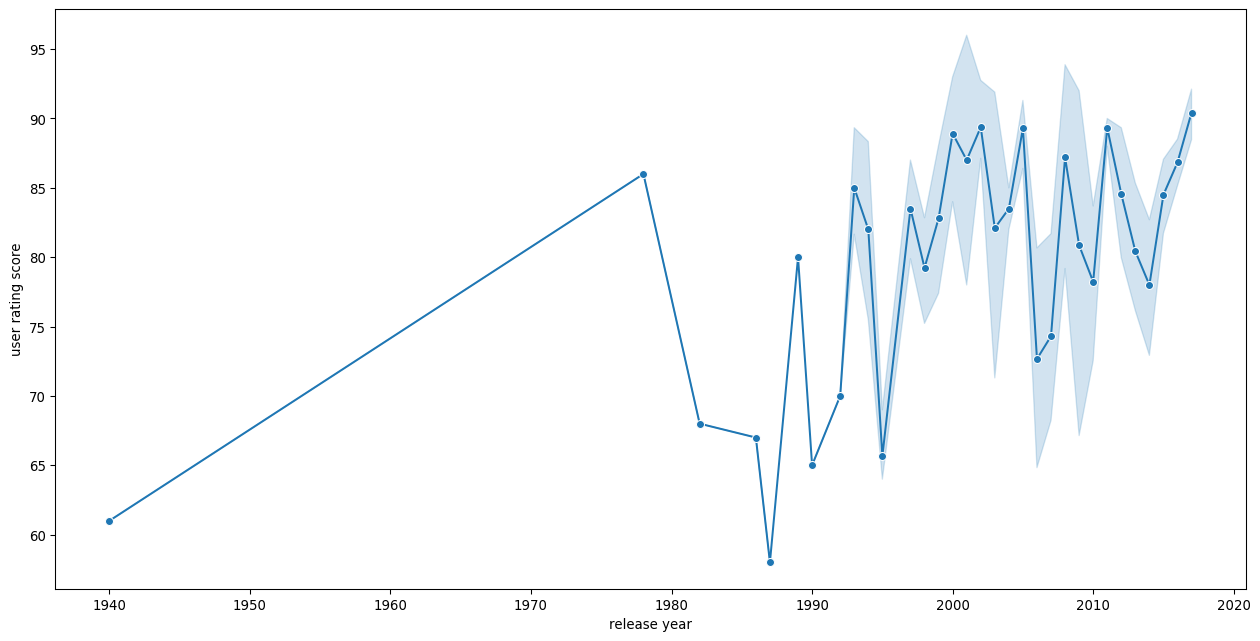

In [46]:
plt.figure(figsize=(16,8), dpi=96)
sns.lineplot(data=NetflixData, x='release year', y='user rating score', palette='tab10', style='user rating size',
    markers=True, dashes=False)
plt.legend('',frameon=False)
plt.show()

#### Write your insghts here

- **The user rating score wavering up and down which does not give any satisfactory indicators.**

#### Write your insghts here